In [120]:
import numpy as np
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt

# Don't Panic
dont_panic = 42

# Industry Data normally distributed with mean 4500 and standard deviation 500
np.random.seed(dont_panic)
industry_profit = np.random.normal(4500, 500, 1000)
industry_mean = np.mean(industry_profit)

# Company Data normally distributed with mean 4700 and standard deviation 500
np.random.seed(dont_panic+1)
company_profit = np.random.normal(4700, 500, 1000)
company_mean = np.mean(company_profit)

In [121]:
# --- Hypothesis Test 1: Industry Claim ---
# H0: µ ≥ 4500
# H1: µ < 4500 (left-tailed test)
alpha = 0.05

t_stat, p_value = ttest_1samp(industry_profit, 4500)
print("Industry T-statistic:", t_stat)
print("Industry P-value:", p_value)

if p_value/2 < alpha:  # Divide p_value by 2 for a one-tailed test
    print("Reject H0: Industry average profit is likely less than $4,500")
else:
    print("Fail to reject H0: Not enough evidence to say industry profit is less than $4,500")


Industry T-statistic: 0.6243089585092725
Industry P-value: 0.5325672436623332
Fail to reject H0: Not enough evidence to say industry profit is less than $4,500


In [122]:


# --- Hypothesis Test 2: Company Belief ---
# H0: µ ≤ 4500
# H1: µ > 4500 (right-tailed test)
alpha = 0.05

t_stat, p_value = ttest_1samp(company_profit, 4500)
print("\nCompany T-statistic:", t_stat)
print("Company P-value:", p_value)

if p_value/2 < alpha:  # Divide p_value by 2 for a one-tailed test
    print("Reject H0: Company average profit is likely greater than $4,500")
else:
    print("Fail to reject H0: Not enough evidence to say company profit exceeds $4,500") 


Company T-statistic: 12.897003202651707
Company P-value: 2.590825673575356e-35
Reject H0: Company average profit is likely greater than $4,500


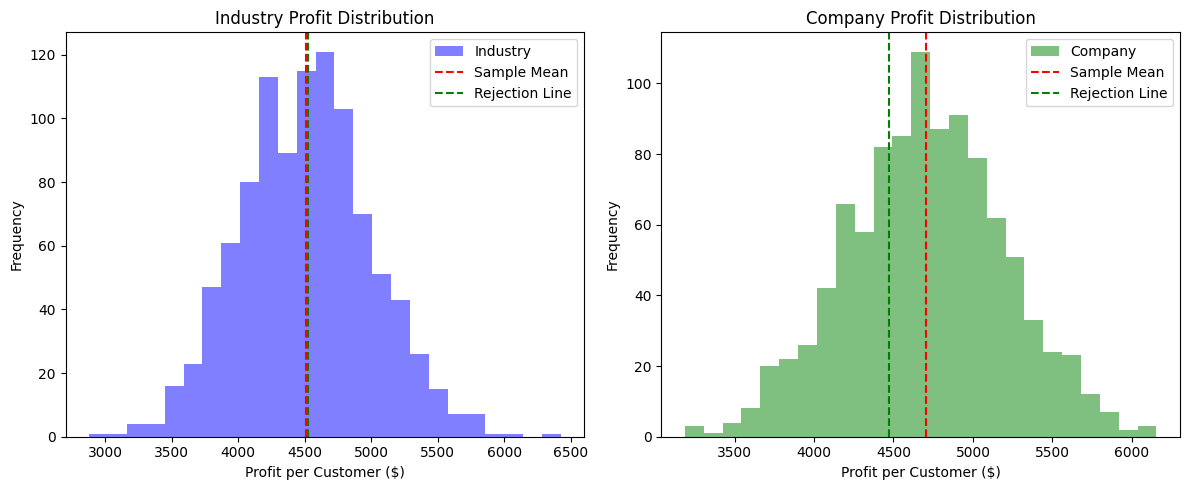

In [123]:
# Calculate the critical t-value for a one-tailed test at alpha = 0.05
critical_t = stats.t.ppf(0.05, df=len(industry_profit)-1)
critical_t_company = stats.t.ppf(0.05, df=len(company_profit)-1)

# --- Histogram ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(industry_profit, bins=25, alpha=0.5, color='blue', label='Industry')
plt.axvline(x=industry_mean, color='red', linestyle='--', label='Sample Mean')
plt.axvline(x=4500 - critical_t * np.std(industry_profit) / np.sqrt(len(industry_profit)), color='green', linestyle='--', label='Rejection Line')
plt.xlabel('Profit per Customer ($)')
plt.ylabel('Frequency')
plt.title('Industry Profit Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(company_profit, bins=25, alpha=0.5, color='green', label='Company')
plt.axvline(x=company_mean, color='red', linestyle='--', label='Sample Mean')
plt.axvline(x=4500 + critical_t_company * np.std(company_profit) / np.sqrt(len(company_profit)), color='green', linestyle='--', label='Rejection Line')
plt.xlabel('Profit per Customer ($)')
plt.ylabel('Frequency')
plt.title('Company Profit Distribution')
plt.legend()

plt.tight_layout()
plt.show()